# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Université de Lorraine</span>

Une fois que l'on dispose de sa liste de DOI nettoyée (voir le notebook "nettoyage_donnees"), il est à présent temps d'appliquer le code du Baromètre national de la Science Ouverte aux données de son propre établissement. Il suffit de remplacer "lorraine" par le nom de son établissement à l'intérieur du code.

## <span style="color:orange">Importer les scripts</span>

Adresse :  https://github.com/MinistereSupRecherche/bso

Copier dans son propre répertoire, à la racine, les fichiers "scanr_utils.py" et "unpwaywall_utils.py". Ce n'est pas une faute de frappe, le fichier s'appelle bien "unpwaywall".

In [1]:
from scanr_utils import *
from unpwaywall_utils import *

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [2]:
with open("Data/outputs/doi_UGA.csv") as f:
    doi_UGA_str = f.read()

In [3]:
doi_UGA_df = pd.read_csv("Data/outputs/doi_UGA.csv",sep="\t")

In [4]:
doi_UGA_df

doi
0       10.1016/j.chemgeo.2016.10.021
1           10.1186/s13601-016-0137-4
2          10.1140/epja/i2016-16375-7
3          10.1103/physrevd.94.122007
4                    10.1002/rcm.7747
...                               ...
22165    10.1016/j.intimp.2019.106080
22166     10.1016/j.purol.2019.09.007
22167       10.1186/s13613-019-0579-7
22168              10.1002/rth2.12214
22169  10.1016/j.ijbiomac.2019.10.200

[22170 rows x 1 columns]

## <span style="color:orange">Enrichissement avec l'API Unpaywall</span>

On ajoute à la liste de DOI constituée précédemment toutes les informations comprises dans l'API Unpaywall : titre, année, statut d'open access... <span style="color:red">**Attention, le processus peut prendre plusieurs heures la première fois que l'on exécute ce code.**</span>

In [5]:
publis_UGA_oa_status = enrich_with_upw_status(doi_UGA_df)
publis_UGA_oa_status
publis_UGA_oa_status.to_csv("Data/outputs/publis_UGA_oa_status.csv",index=False)

22170 publications
0 %, 0 %, 0 %, 1 %, 1 %, 1 %, 1 %, 2 %, 2 %, 2 %, 2 %, 2 %, 3 %, 3 %, 3 %, 3 %, 4 %, 4 %, 4 %, 4 %, 5 %, 5 %, 5 %, 5 %, 5 %, 6 %, 6 %, 6 %, 6 %, 7 %, 7 %, 7 %, 7 %, 7 %, 8 %, 8 %, 8 %, 8 %, 9 %, 9 %, 9 %, 9 %, 9 %, 10 %, 10 %, 10 %, 10 %, 11 %, 11 %, 11 %, 11 %, 12 %, 12 %, 12 %, 12 %, 12 %, 13 %, 13 %, 13 %, 13 %, 14 %, 14 %, 14 %, 14 %, 14 %, 15 %, 15 %, 15 %, 15 %, 16 %, 16 %, 16 %, 16 %, 16 %, 17 %, 17 %, 17 %, 17 %, 18 %, 18 %, 18 %, 18 %, 18 %, 19 %, 19 %, 19 %, 19 %, 20 %, 20 %, 20 %, 20 %, 21 %, 21 %, 21 %, 21 %, 21 %, 22 %, 22 %, 22 %, 22 %, 23 %, 23 %, 23 %, 23 %, 23 %, 24 %, 24 %, 24 %, 24 %, 25 %, 25 %, 25 %, 25 %, 25 %, 26 %, 26 %, 26 %, 26 %, 27 %, 27 %, 27 %, 27 %, 28 %, 28 %, 28 %, 28 %, 28 %, 29 %, 29 %, 29 %, 29 %, 30 %, 30 %, 30 %, 30 %, 30 %, 31 %, 31 %, 31 %, 31 %, 32 %, 32 %, 32 %, 32 %, 32 %, 33 %, 33 %, 33 %, 33 %, 34 %, 34 %, 34 %, 34 %, 35 %, 35 %, 35 %, 35 %, 35 %, 36 %, 36 %, 36 %, 36 %, 37 %, 37 %, 37 %, 37 %, 37 %, 38 %, 38 %, 38 %, 38 %

Enregistrer le résultat dans un fichier CSV pour ne pas avoir à refaire ce travail plusieurs fois :

In [6]:
publis_UGA_oa_status = pd.read_csv("Data/outputs/publis_UGA_oa_status.csv")

Avoir le fichier en format Excel lisible par les humains :

In [7]:
publis_UGA_oa_status.to_excel("Data/outputs/publis_UGA_oa_status.xls",index=False)

## <span style="color:orange">Ajouter à la DataFrame le champ "scientific field" pour ajouter le domaine pour chaque DOI grâce au jeu de données du Baromètre</soan>

Le jeu de données est disponible à cette adresse : https://data.enseignementsup-recherche.gouv.fr/explore/dataset/open-access-monitor-france/export/?disjunctive.oa_host_type&disjunctive.year

<span style="color:red">**Il faut le télécharger chaque année et le placer au même endroit (Barometre_SO_lorraine -> raw) pour mettre à jour les données.**</span>

### Lire le jeu de données du Baromètre national et le stocker dans une variable

In [42]:
with open("Data/raw/open-access-monitor-france.csv", encoding='utf-8') as f:
    open_access_monitor_france_str = f.read()

In [43]:
open_access_monitor_france_df = pd.read_csv("Data/raw/open-access-monitor-france.csv", encoding='utf-8',sep=";")

### Fusionner la DataFrame Lorraine et le jeu de données du Baromètre sur le critère du DOI pour ajouter le champ "scientific field"

In [44]:
df_complete = pd.merge(publis_UGA_oa_status, open_access_monitor_france_df[['doi', 'scientific_field']], how="left", on="doi")
df_complete['scientific_field'].fillna('unknown', inplace = True)

In [45]:
df_complete

doi               oa_type  is_oa  \
0       10.1016/j.chemgeo.2016.10.021                closed  False   
1           10.1186/s13601-016-0137-4  publisher;repository   True   
2          10.1140/epja/i2016-16375-7                closed  False   
3          10.1103/physrevd.94.122007  publisher;repository   True   
4                    10.1002/rcm.7747                closed  False   
...                               ...                   ...    ...   
22165    10.1016/j.intimp.2019.106080             publisher   True   
22166     10.1016/j.purol.2019.09.007                closed  False   
22167       10.1186/s13613-019-0579-7  publisher;repository   True   
22168              10.1002/rth2.12214  publisher;repository   True   
22169  10.1016/j.ijbiomac.2019.10.200                closed  False   

                                                   title published_date  \
0      A review of the coordination chemistry of hydr...     2016-12-01   
1      ARIA 2016: Care pathways implementing emerging...     2016-12-01   
2      Erratum to: Proton-hole and core-excited state...     2016-12-01   
3      Ultrahigh-energy neutrino follow-up of gravita...     2016-12-30   
4      Automated system measuring triple oxygen and n...     2016-11-06   
...                                                  ...            ...   
22165       Exogenous hormones and hereditary angioedema     2020-01-01   
22166                               Traumatismes du rein     2019-11-01   
22167  Withholding and withdrawing life-support in ad...     2019-09-23   
22168  Evaluation of the predictive value of the blee...     2019-05-25   
22169  Characterization of novel lectins from Burkhol...     2020-06-01   

       published_year            genre journal_is_in_doaj  \
0              2016.0  journal-article              False   
1              2016.0  journal-article               True   
2              2016.0  journal-article              False   
3              2016.0  journal-article              False   
4              2016.0  journal-article              False   
...               ...              ...                ...   
22165          2020.0  journal-article              False   
22166          2019.0  journal-article              False   
22167          2019.0  journal-article               True   
22168          2019.0  journal-article               True   
22169          2020.0  journal-article              False   

             journal_issns                                       journal_name  \
0                0009-2541                                   Chemical Geology   
1                2045-7022                 Clinical and Translational Allergy   
2      1434-6001,1434-601X                    The European Physical Journal A   
3      2470-0010,2470-0029                                  Physical Review D   
4                0951-4198          Rapid Communications in Mass Spectrometry   
...                    ...                                                ...   
22165            1567-5769                   International Immunopharmacology   
22166            1166-7087                                Progrès en Urologie   
22167            2110-5820                           Annals of Intensive Care   
22168            2475-0379  Research and Practice in Thrombosis and Haemos...   
22169            0141-8130  International Journal of Biological Macromolec...   

                                     publisher  \
0                                  Elsevier BV   
1      Springer Science and Business Media LLC   
2      Springer Science and Business Media LLC   
3              American Physical Society (APS)   
4                                        Wiley   
...                                        ...   
22165                              Elsevier BV   
22166                              Elsevier BV   
22167  Springer Science and Business Media LLC   
22168                                    Wiley   
22169                              E

Les publications de l'Université de Lorraine ont été enrichies par l'ajout du champ "scientific field" produit par le Ministère. En revanche, les données lorraines couvrent la période 2016-2019, alors que le Baromètre s'arrête en 2018 : l'information du domaine disciplinaire sera donc absente pour l'année 2019. 

In [46]:
df_complete.to_csv("Data/outputs/publis_UGA_completes.csv",index=False)

<span style="color:green">**La liste de DOI enrichie par les informations présentes dans l'API Unpaywall et par le code du Ministère permettant de connaître la discipline a été stockée sous forme de fichier CSV dans le dossier Data > outputs.**</span>

Avoir le fichier en format Excel lisible par les humains :

In [47]:
df_complete.to_excel("Data/outputs/publis_UGA_completes.xls",index=False)

A partir de ce fichier, il est très simple de construire des requêtes. Exemple : combien de publications auprès de l'éditeur Wiley ont été recensées dans le jeu de données ?

In [48]:
df_complete.loc[df_complete['publisher'] == "Wiley",:]

doi               oa_type  is_oa  \
4            10.1002/rcm.7747                closed  False   
11     10.1002/adma.201604019            repository   True   
49     10.1002/slct.201601859                closed  False   
64          10.1002/jcc.24506                closed  False   
82     10.1002/adma.201603638                closed  False   
...                       ...                   ...    ...   
22116  10.1002/chem.201802240                closed  False   
22118       10.1002/ajh.25050             publisher   True   
22128        10.1113/jp275579  publisher;repository   True   
22158       10.1002/hep.30034             publisher   True   
22168      10.1002/rth2.12214  publisher;repository   True   

                                                   title published_date  \
4      Automated system measuring triple oxygen and n...     2016-11-06   
11     The Impact of Phase Retention on the Structura...     2016-10-19   
49     Recyclable Silica-Supported Proline Sulphonami...     2016-12-16   
64     Probing gas adsorption in MOFs using an effici...     2016-10-08   
82     Ferroelectric Control of Organic/Ferromagnetic...     2016-10-06   
...                                                  ...            ...   
22116  NO2-functionalized bis(pyrazolate) MOFs as CO2...     2018-08-27   
22118  Nationwide Survey on the Use of Horse Antithym...     2018-02-14   
22128  The force and stiffness of myosin motors in th...     2018-05-27   
22158  Extra hepatic cancers are the leading cause of...     2018-07-10   
22168  Evaluation of the predictive value of the blee...     2019-05-25   

       published_year            genre journal_is_in_doaj  \
4              2016.0  journal-article              False   
11             2016.0  journal-article              False   
49             2016.0  journal-article              False   
64             2016.0  journal-article              False   
82             2016.0  journal-article              False   
...               ...              ...                ...   
22116          2018.0  journal-article              False   
22118          2018.0  journal-article              False   
22128          2018.0  journal-article              False   
22158          2018.0  journal-article              False   
22168          2019.0  journal-article               True   

             journal_issns                                       journal_name  \
4                0951-4198          Rapid Communications in Mass Spectrometry   
11               0935-9648                                 Advanced Materials   
49               2365-6549                                    ChemistrySelect   
64               0192-8651                 Journal of Computational Chemistry   
82               0935-9648                                 Advanced Materials   
...                    ...                                                ...   
22116            0947-6539                     Chemistry - A European Journal   
22118            0361-8609                     American Journal of Hematology   
22128            0022-3751                          The Journal of Physiology   
22158  0270-9139,1527-3350                                         Hepatology   
22168            2475-0379  Research and Practice in Thrombosis and Haemos...   

      publisher              scientific_field  
4         Wiley                     Chemistry  
11        Wiley  Physical sciences, Astronomy  
49        Wiley                     Chemistry  
64        Wiley                     Chemistry  
82        Wiley  Physical sciences, Astronomy  
...         ...                           ...  
22116     Wiley                     Chemistry  
22118     Wiley              Medical research  
22128     Wiley               Biology (fond.)  
22158     Wiley              Medical research  
22168     Wiley                       unknown  

[1551 rows x 12 columns]

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### Importer les libraires nécessaires

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### *Proportion des publications 2018 en accès ouvert (mesuré en 2020)*

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2018 et les isoler dans la variable "pie_data". **Bien que ce calcul soit réalisé en 2020, il est plus pertinent d'utiliser les données 2018 que les données 2019 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en 2020 la réelle ouverture des publications de l'année précédente**.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

Isoler l'année 2018 :

In [51]:
pie_data = df_complete.loc[df_complete['published_year'] == 2018.0,:]

Définir les deux niveaux dans le graphique : accès ouvert ou non (variable "oa_yes_no"), type d'accès ouvert (variable "type_oa") :

In [52]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index()
oa_yes_no = oa_yes_no.rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

Accès fermé global     2329
Accès ouvert global    3767
Name: is_oa, dtype: int64

In [53]:
type_oa = pie_data['oa_type'].value_counts().sort_index()
type_oa = type_oa.rename({'closed': 'Accès fermé', 'publisher' : "Editeur", 'publisher;repository' : 'Editeur & Archive ouverte', 
                         'repository' : 'Archive ouverte'})
type_oa

Accès fermé                  2329
Editeur                       471
Editeur & Archive ouverte    1762
Archive ouverte              1534
Name: oa_type, dtype: int64

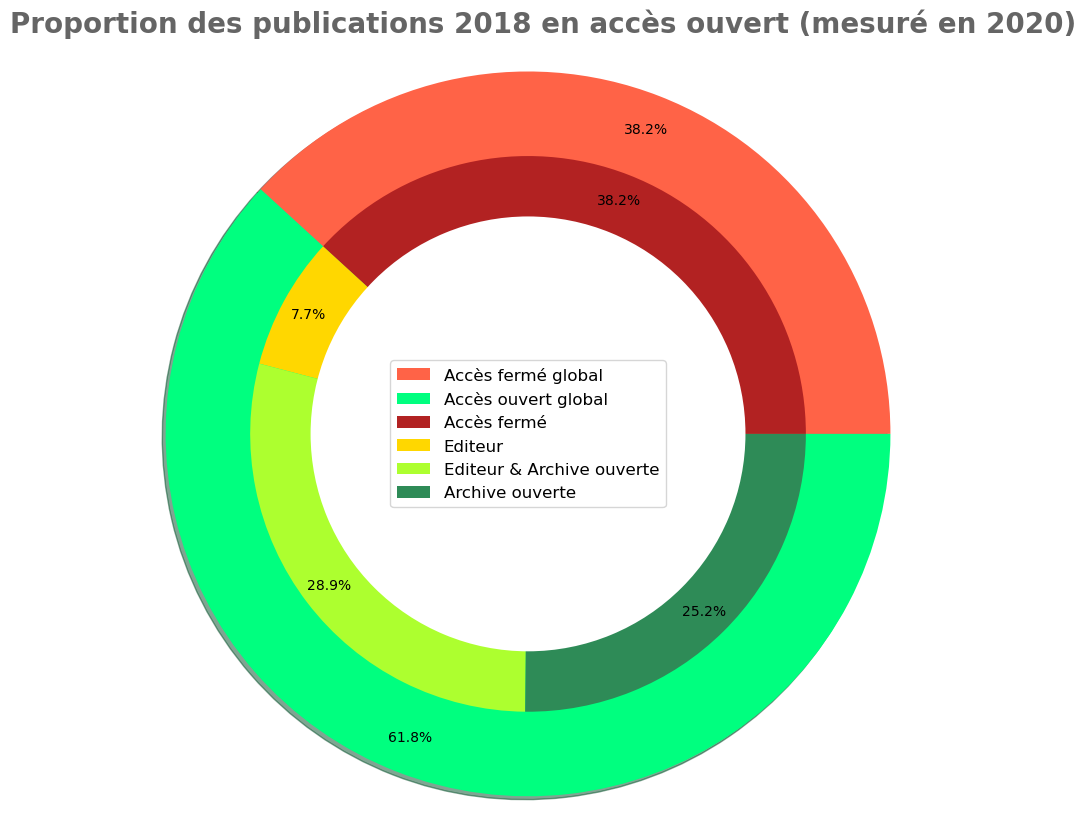

In [54]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.pie(oa_yes_no, labels=oa_yes_no.index, radius=3, labeldistance = None, colors=['tomato', 'springgreen'], autopct=lambda x: str(round(x, 1)) + '%', pctdistance = 0.9, shadow = True);
ax.pie(type_oa, labels=type_oa.index, radius=2.3, labeldistance = None, colors=['firebrick','gold','greenyellow','seagreen'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9);
ax.pie([1], radius=1.8, colors='white');
ax.legend(loc="center", fontsize = 12)
plt.title('Proportion des publications 2018 en accès ouvert (mesuré en 2020)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/proportion_publications_oa.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Il peut être intéressant d'identifier les publications publiées uniquement en accès ouvert "Editeur", pour ensuite déposer ces publications dans une archive ouverte. Pour cela, saisir le code ci-dessous.

In [55]:
publications_ouvertes_editeurs = pie_data.loc[(pie_data['oa_type'] == 'publisher')]

Capturer ensuite le résultat dans un fichier. Ici on va utiliser "to_excel" et pas "to_csv" afin d'obtenir un résultat directement lisible par l'humain.

In [56]:
publications_ouvertes_editeurs.to_excel("Data/outputs/publications_ouvertes_editeurs.xls", index=False)

### *Evolution du taux d'accès ouvert aux publications 2016-2019*

**Isoler les publications des années souhaitées**

Quelques publications d'autres années peuvent se glisser, si l'année est mal renseignée dans les bases de données. Il vaut mieux donc s'assurer que les bonnes années sont utilisées. <span style="color:red">**Pour mettre à jour ce graphique, il faut ajouter la nouvelle année et changer le nom de la variable. df_complete_20162019 devient par exemple df_complete20162020. Attention, il faudra penser à changer le nom de cette variable dans le reste du code.**</span>

In [57]:
df_complete_20162019 = df_complete.loc[(df_complete['published_year'] == 2016.0) | (df_complete['published_year'] == 2017.0) 
                                       | (df_complete['published_year'] == 2018.0) | (df_complete['published_year'] == 2019.0),:]


# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)
df_complete_20162019.is_oa = df_complete_20162019.is_oa.astype(bool)

**Préparer les données pour chaque type d'accès ouvert**

Les différents types d'accès ouvert sont : 
- "Editeur" : publication en accès ouvert chez un éditeur uniquement
- "Editeur et Archive ouverte" : publication à la fois en accès ouvert chez un éditeur et en dépôt dans une archive ouverte
- "Archive ouverte" : publication en accès ouvert uniquement dans une archive ouverte

In [58]:
df_complete_20162019['oa_publisher_repository'] = df_complete_20162019.oa_type=='publisher;repository'
df_complete_20162019['oa_repository'] = df_complete_20162019.oa_type=='repository'
df_complete_20162019['oa_publisher'] = df_complete_20162019.oa_type=='publisher'
df_complete_20162019['oa_unk'] = df_complete_20162019.oa_type=='unknown'

**Définition du taux d'accès ouvert global par année**

In [59]:
df_oa_global_year = pd.DataFrame(df_complete_20162019.groupby(['published_year'])[['is_oa', 'oa_repository', 
                                                                                   'oa_publisher', 'oa_unk', 
                                                                                   'oa_publisher_repository']]
                                 .agg(['count', np.mean])).reset_index()
df_oa_global_year.columns = ['published_year', 'nb_doi', 'oa_mean', 'nbdoi1', 'oa_repository_mean', 'nb_doi2', 
                             'oa_publisher_mean', 'nb_doi3', 'oa_unk_mean', 'nb_doi4', 'oa_publisher_repository_mean']
df_oa_global_year['year_label'] = df_oa_global_year.apply(lambda x:"{}\n({} publications)".format(int(x.published_year), int(x.nb_doi)), 
                                                          axis=1)
df_oa_global_year = df_oa_global_year.sort_values(by='published_year', ascending=True)


**Réalisation du graphique**

Attention ici, lors de la mise à jour du graphique avec une année supplémentaire, il faut bien penser à modifier dans le code l'intervalle d'années choisi. Par exemple lors de l'ajout des données de 2020, il faudra remplacer :

for year_ix in range(0, 4):

par

for year_ix in range(0, 5):

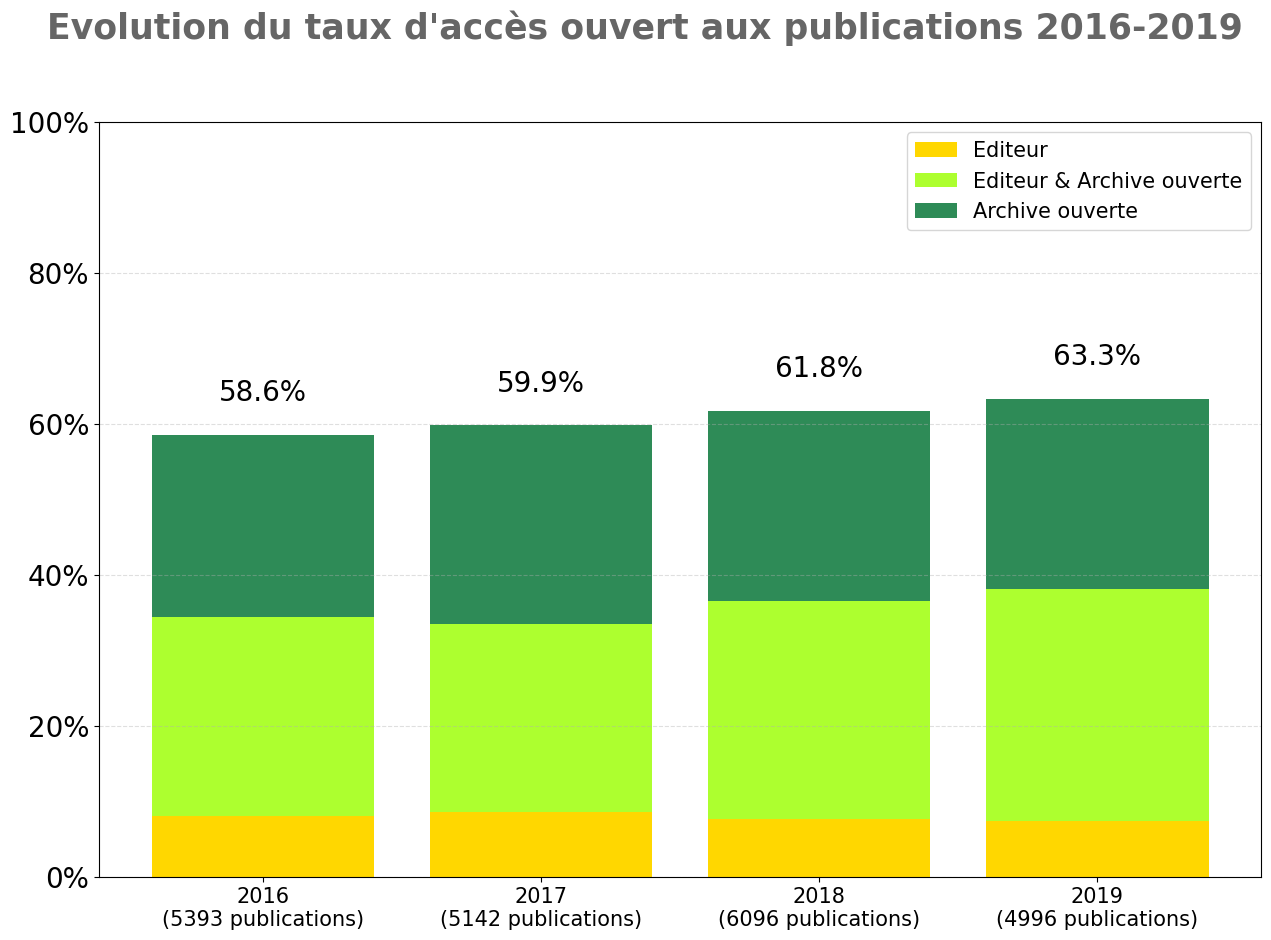

In [77]:
graph_type = 'poster'

if graph_type == 'poster':
    fig, (ax) = plt.subplots(figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
else:
    fig, (ax) = plt.subplots(figsize=(10, 12), dpi=100, facecolor='w', edgecolor='k')


years = df_oa_global_year.year_label.tolist()
y_pos = np.arange(len(years))

oa_publisher_repository_mean = df_oa_global_year.oa_publisher_repository_mean.tolist() 
oa_repository_mean = df_oa_global_year.oa_repository_mean.tolist() 
oa_publisher_mean = df_oa_global_year.oa_publisher_mean.tolist() 
oa_unk_mean = df_oa_global_year.oa_unk_mean.tolist()


oa_total_mean = list( map(lambda x,y: x+y, oa_publisher_repository_mean, oa_repository_mean))
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_publisher_mean)  )
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_unk_mean)  )     


rect1 = ax.bar(y_pos, oa_publisher_mean, align='center', alpha = 1.0, color='gold',
        ecolor='black', label="Editeur")

ax.bar(y_pos, oa_publisher_repository_mean, align='center', alpha = 1.0, color='greenyellow',
        bottom = oa_publisher_mean,
        ecolor='black', label="Editeur & Archive ouverte")

ax.bar(y_pos, oa_repository_mean, align='center',alpha = 1.0, color='seagreen',
       bottom = [oa_publisher_mean[i] + oa_publisher_repository_mean[i] for i in range(0, len(oa_publisher_mean))], 
         ecolor='black', label="Archive ouverte")


w = rect1[0].get_width()
# Lors de l'ajout (ou du retrait) d'une nouvelle année pendant la génération de ce graphique, penser à changer l'intervalle.
# Pour observer la période 2016-2020, il faudra remplacer range(0, 4) par range (O,5)
for year_ix in range(0, 4):
    ax.annotate("{:,.1%}".format(oa_total_mean[year_ix]),
                        xy=(year_ix , oa_total_mean[year_ix]),
                        xytext=(0, 20),  
                        size=20,
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_xticks(y_pos)
ax.set_xticklabels(years, fontsize = 15)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylim([0,1])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()], fontsize = 20)
# En cas de taux d'accès ouvert très important, il est préférable de changer la place de la légende pour plus de lisibilité :
# ax.legend(fontsize=15, loc='lower right')
ax.legend(fontsize=15)
ax.yaxis.grid(ls='--', alpha=0.4)

# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)

plt.title("Evolution du taux d'accès ouvert aux publications 2016-2019", fontsize = 25, x = 0.47, y = 1.1,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/evolution_oa_annees.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2018 par discipline (calculé en 2020)*

Les données du Baromètre n'étant pas encore mise à jour, le taux par discipline pour 2019 ne peut pas encore être visualisé.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2018**

In [61]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

In [62]:
publications_par_domaine = publications_2018['scientific_field'].value_counts().sort_index()
publications_par_domaine

Biology (fond.)                                  846
Chemistry                                        455
Computer and \n information sciences             344
Earth, Ecology, \nEnergy and applied biology     850
Engineering                                      305
Humanities                                        26
Mathematics                                      167
Medical research                                1246
Physical sciences, Astronomy                    1650
Social sciences                                   23
unknown                                          184
Name: scientific_field, dtype: int64

In [63]:
df_oa_discipline_global = pd.crosstab([publications_2018['scientific_field']],publications_2018['oa_type'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global["Total"] = publications_par_domaine
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global["y_label"] = df_oa_discipline_global.index + "\n" + df_oa_discipline_global["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global.index = df_oa_discipline_global["y_label"]
df_oa_discipline_global

oa_type                                             closed  publisher  \
y_label                                                                 
Biology (fond.)\n846 publications                      231         51   
Chemistry\n455 publications                            250         40   
Computer and \n information sciences\n344 publi...     110         32   
Earth, Ecology, \nEnergy and applied biology\n8...     299         48   
Engineering\n305 publications                          184         30   
Humanities\n26 publications                             11          2   
Mathematics\n167 publications                           28         13   
Medical research\n1246 publications                    590        169   
Physical sciences, Astronomy\n1650 publications        532         63   
Social sciences\n23 publications                        13          2   
unknown\n184 publications                               81         21   

oa_type                                             publisher;repository  \
y_label                                                                    
Biology (fond.)\n846 publications                                    444   
Chemistry\n455 publications                                           83   
Computer and \n information sciences\n344 publi...                    44   
Earth, Ecology, \nEnergy and applied biology\n8...                   256   
Engineering\n305 publications                                         15   
Humanities\n26 publications                                            5   
Mathematics\n167 publications                                         18   
Medical research\n1246 publications                                  341   
Physical sciences, Astronomy\n1650 publications                      514   
Social sciences\n23 publications                                       3   
unknown\n184 publications                                             39   

oa_type                                             repository  Total  \
y_label                                                                 
Biology (fond.)\n846 publications                          120    846   
Chemistry\n455 publications                                 82    455   
Computer and \n information sciences\n344 publi...         158    344   
Earth, Ecology, \nEnergy and applied biology\n8...         247    850   
Engineering\n305 publications                               76    305   
Humanities\n26 publications                                  8     26   
Mathematics\n167 publications                              108    167   
Medical research\n1246 publications                        146   1246   
Physical sciences, Astronomy\n1650 publications            541   1650   
Social sciences\n23 publications                             5     23   
unknown\n184 publications                                   43    184   

oa_type                                                                                       y_label  
y_label                                                                                                
Biology (fond.)\n846 publications                                   Biology (fond.)\n846 publications  
Chemistry\n455 publications                                               Chemistry\n455 publications  
Computer and \n information sciences\n344 publi...  Computer and \n information sciences\n344 publ...  
Earth, Ecology, \nEnergy and applied biology\n8...  Earth, Ecology, \nEnergy and applied biology\n...  
Engineering\n305 publications                                           Engineering\n305 publications  
Humanities\n26 publications                                               Humanities\n26 publications  
Mathematics\n167 publications                                           Mathematics\n167 publications  
Medical research\n1246 publications                               Medical research\n1246 publications  
Physical sciences, Astronomy\n1650 publications       Physical sciences

**Convertir le résultat en pourcentages**

In [64]:
df_oa_discipline = pd.crosstab([publications_2018['scientific_field']],publications_2018['oa_type'])
df_oa_discipline = (df_oa_discipline.T / df_oa_discipline.T.sum()).mul(100).round(1)
df_oa_discipline = df_oa_discipline.T
df_oa_discipline["Total"] = publications_par_domaine
df_oa_discipline["y_label"] = df_oa_discipline.index + "\n" + df_oa_discipline["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline.index = df_oa_discipline["y_label"]
df_oa_discipline

oa_type                                             closed  publisher  \
y_label                                                                 
Biology (fond.)\n846 publications                     27.3        6.0   
Chemistry\n455 publications                           54.9        8.8   
Computer and \n information sciences\n344 publi...    32.0        9.3   
Earth, Ecology, \nEnergy and applied biology\n8...    35.2        5.6   
Engineering\n305 publications                         60.3        9.8   
Humanities\n26 publications                           42.3        7.7   
Mathematics\n167 publications                         16.8        7.8   
Medical research\n1246 publications                   47.4       13.6   
Physical sciences, Astronomy\n1650 publications       32.2        3.8   
Social sciences\n23 publications                      56.5        8.7   
unknown\n184 publications                             44.0       11.4   

oa_type                                             publisher;repository  \
y_label                                                                    
Biology (fond.)\n846 publications                                   52.5   
Chemistry\n455 publications                                         18.2   
Computer and \n information sciences\n344 publi...                  12.8   
Earth, Ecology, \nEnergy and applied biology\n8...                  30.1   
Engineering\n305 publications                                        4.9   
Humanities\n26 publications                                         19.2   
Mathematics\n167 publications                                       10.8   
Medical research\n1246 publications                                 27.4   
Physical sciences, Astronomy\n1650 publications                     31.2   
Social sciences\n23 publications                                    13.0   
unknown\n184 publications                                           21.2   

oa_type                                             repository  Total  \
y_label                                                                 
Biology (fond.)\n846 publications                         14.2    846   
Chemistry\n455 publications                               18.0    455   
Computer and \n information sciences\n344 publi...        45.9    344   
Earth, Ecology, \nEnergy and applied biology\n8...        29.1    850   
Engineering\n305 publications                             24.9    305   
Humanities\n26 publications                               30.8     26   
Mathematics\n167 publications                             64.7    167   
Medical research\n1246 publications                       11.7   1246   
Physical sciences, Astronomy\n1650 publications           32.8   1650   
Social sciences\n23 publications                          21.7     23   
unknown\n184 publications                                 23.4    184   

oa_type                                                                                       y_label  
y_label                                                                                                
Biology (fond.)\n846 publications                                   Biology (fond.)\n846 publications  
Chemistry\n455 publications                                               Chemistry\n455 publications  
Computer and \n information sciences\n344 publi...  Computer and \n information sciences\n344 publ...  
Earth, Ecology, \nEnergy and applied biology\n8...  Earth, Ecology, \nEnergy and applied biology\n...  
Engineering\n305 publications                                           Engineering\n305 publications  
Humanities\n26 publications                                               Humanities\n26 publications  
Mathematics\n167 publications                                           Mathematics\n167 publications  
Medical research\n1246 publications                               Medical research\n1246 publications  
Physical sciences, Astronomy\n1650 publications       Physical sciences

**Générer le graphique**

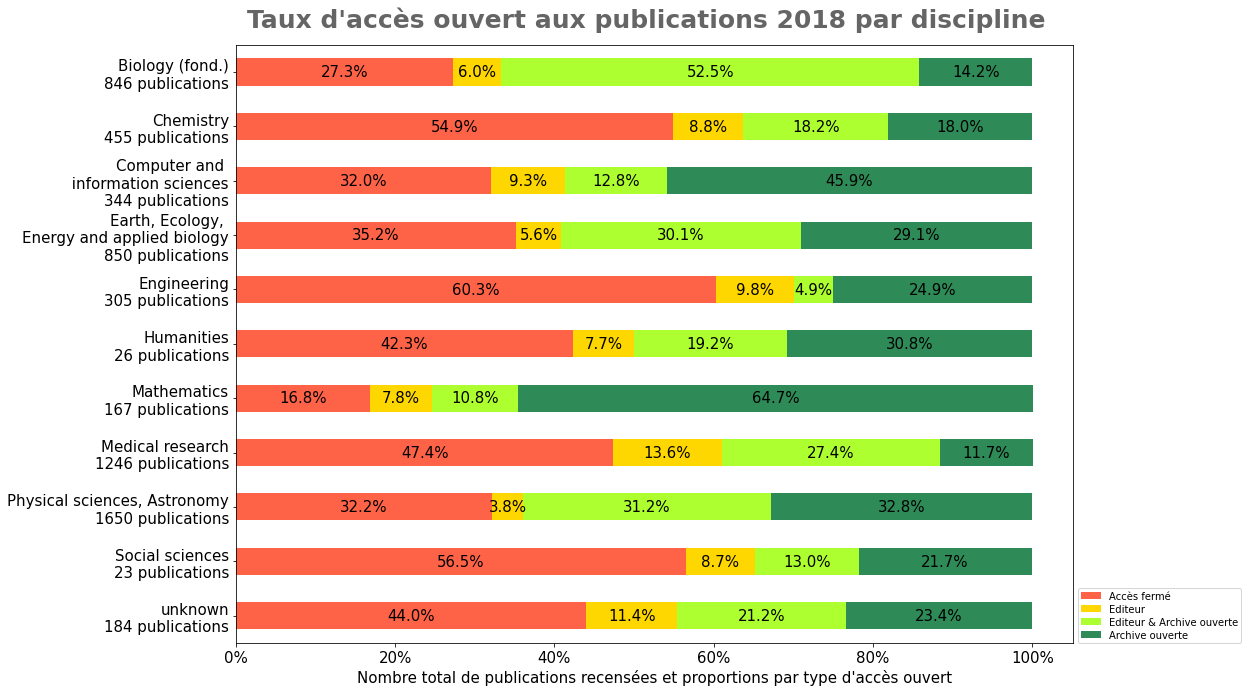

In [65]:
import matplotlib.ticker as mtick

ax = df_oa_discipline.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline.columns:
    for i in df_oa_discipline.index:
        label = str(df_oa_discipline.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_discipline.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Variante du code pour les établissements travaillant sur de petits jeux de données :

In [66]:
ax = df_oa_discipline_global.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])

labels = []
for j in df_oa_discipline_global.columns:
    for i in df_oa_discipline_global.index:
        label = str(df_oa_discipline_global.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 15)

plt.gca().invert_yaxis()
plt.legend(    loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
            borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_discipline_en_nb_total.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2019 par éditeur / préfixe DOI (calculé en 2020)*

Le Baromètre du Mnistère montre le taux d'accès ouvert aux publications par éditeur, ce qui a du sens au niveau national. Mais au niveau local, il semble plus judicieux de regarder auprès de quels éditeurs publient en majorité les chercheurs, puis de regarder ces éditeurs de plus près.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2018**

In [67]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Voir quels sont les 20 éditeurs majoritaires au sein de la production de l'Université de Lorraine**

In [68]:
publications_par_editeur = publications_2018['publisher'].value_counts().iloc[0:20]
publications_par_editeur

Elsevier BV                                                 1449
Springer Science and Business Media LLC                      855
Wiley                                                        405
American Physical Society (APS)                              313
American Chemical Society (ACS)                              288
EDP Sciences                                                 190
IOP Publishing                                               164
Institute of Electrical and Electronics Engineers (IEEE)     161
Oxford University Press (OUP)                                158
Royal Society of Chemistry (RSC)                             151
MDPI AG                                                      123
AIP Publishing                                               119
SPIE                                                         100
Informa UK Limited                                            90
Springer International Publishing                             82
American Geophysical Unio

On remarque ici qu'il y a parfois des doublons : par exemple, IEEE apparaît une fois sous la forme "IEEE", une fois sous la forme "Institute of Electrical and Electronics Engineers (IEEE). Ce doublon provient de l'API Unpaywall et ne peut donc être corrigé ici. En comparant les taux d'accès ouvert de ces deux "éditeurs" (qui est en réalité le même), on peut voir qu'ils sont très proches. Il n'est donc pas nécessaire de le reprendre dans la liste ci-dessous, au risque de provoquer de la confusion. "Springer Science and Business Media LLC" n'est en revanche pas un doublon de "Springer International Publishing".

**Choisir les éditeurs voulus**

Un graphique présentant le taux d'accès ouvert pour chaque éditeur deviendrait illisible. Pour l'Université de Lorraine par exemple, près de 250 éditeurs sont concernés. Pour des raisons de lisibilité du graphique, seuls les 20 éditeurs ou les plateformes les plus représentés au sein des publications 2018 sont donc repris ici ; mais si l'on s'intéresse à d'autres éditeurs, il suffit de modifier ou d'ajouter leur nom dans le code ci-dessous.

In [69]:
filter = ['Elsevier BV', 'Springer Science and Business Media LLC', 'Wiley', 'Springer International Publishing',
         'IEEE', 'IOP Publishing', 'MDPI AG', 'American Chemical Society (ACS)', 'Oxford University Press (OUP)',
         'Informa UK Limited', 'AIP Publishing','Ovid Technologies (Wolters Kluwer Health)', 'EDP Sciences',
         'Royal Society of Chemistry (RSC)', 'CAIRN', 'Frontiers Media SA', 'American Physical Society (APS)',
        'OpenEdition', 'International Union of Crystallography (IUCr)'] 

editeurs_2018 = publications_2018[publications_2018['publisher'].isin(filter)]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par éditeur dans l'année ?**

In [70]:
df_oa_editeur_global = pd.crosstab([editeurs_2018['publisher']],editeurs_2018['oa_type'])
df_oa_editeur_global["Total"] = publications_par_editeur
df_oa_editeur_global["y_label"] = df_oa_editeur_global.index + " - " + df_oa_editeur_global["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur_global.index = df_oa_editeur_global["y_label"]
df_oa_editeur_global.sort_values(by='closed', ascending=False)

oa_type                                             closed  publisher  \
y_label                                                                 
Elsevier BV - 1449.0 publications                      843        145   
Springer Science and Business Media LLC - 855.0...     228         25   
Wiley - 405.0 publications                             190         48   
American Chemical Society (ACS) - 288.0 publica...     161          5   
Royal Society of Chemistry (RSC) - 151.0 public...      77         15   
Informa UK Limited - 90.0 publications                  51          6   
IOP Publishing - 164.0 publications                     48         24   
AIP Publishing - 119.0 publications                     43          7   
Ovid Technologies (Wolters Kluwer Health) - nan...      39          4   
Springer International Publishing - 82.0 public...      36          2   
American Physical Society (APS) - 313.0 publica...      35          4   
IEEE - 60.0 publications                                30          0   
Oxford University Press (OUP) - 158.0 publications      26         24   
International Union of Crystallography (IUCr) -...      15         12   
EDP Sciences - 190.0 publications                        4          9   
CAIRN - nan publications                                 3          0   
OpenEdition - nan publications                           1          0   
Frontiers Media SA - nan publications                    0          0   
MDPI AG - 123.0 publications                             0         12   

oa_type                                             publisher;repository  \
y_label                                                                    
Elsevier BV - 1449.0 publications                                    144   
Springer Science and Business Media LLC - 855.0...                   423   
Wiley - 405.0 publications                                            79   
American Chemical Society (ACS) - 288.0 publica...                    34   
Royal Society of Chemistry (RSC) - 151.0 public...                    26   
Informa UK Limited - 90.0 publications                                16   
IOP Publishing - 164.0 publications                                   29   
AIP Publishing - 119.0 publications                                   15   
Ovid Technologies (Wolters Kluwer Health) - nan...                     4   
Springer International Publishing - 82.0 public...                     5   
American Physical Society (APS) - 313.0 publica...                   116   
IEEE - 60.0 publications                                               0   
Oxford University Press (OUP) - 158.0 publications                    52   
International Union of Crystallography (IUCr) -...                    24   
EDP Sciences - 190.0 publications                                    173   
CAIRN - nan publications                                               0   
OpenEdition - nan publications                                         0   
Frontiers Media SA - nan publications                                 60   
MDPI AG - 123.0 publications                                         111   

oa_type                                             repository   Total  \
y_label                                                                  
Elsevier BV - 1449.0 publications                          317  1449.0   
Springer Science and Business Media LLC - 855.0...         179   855.0   
Wiley - 405.0 publications                                  88   405.0   
American Chemical Society (ACS) - 288.0 publica...          88   288.0   
Royal Society of Chemistry (RSC) - 151.0 public...          33   151.0   
Informa UK Limited - 90.0 publications                      17    90.0   
IOP Publishing - 164.0 publications                         63   164.0   
AIP Publishing - 119.0 publications                         54   119.0   
Ovid Technologies (Wolters Kluwer Health) - nan...          10     NaN   
Springer International Publishing - 82.0 public...     

**Convertir le résultat en pourcentages**

In [71]:
df_oa_editeur = pd.crosstab([editeurs_2018['publisher']],editeurs_2018['oa_type'])
df_oa_editeur = (df_oa_editeur.T / df_oa_editeur.T.sum()).mul(100).round(1)
df_oa_editeur = df_oa_editeur.T
df_oa_editeur["Total"] = publications_par_editeur
df_oa_editeur["y_label"] = df_oa_editeur.index + " - " + df_oa_editeur["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur.index = df_oa_editeur["y_label"]
df_oa_editeur = df_oa_editeur.sort_values(by='closed', ascending=False)
df_oa_editeur

oa_type                                             closed  publisher  \
y_label                                                                 
CAIRN - nan publications                              75.0        0.0   
Ovid Technologies (Wolters Kluwer Health) - nan...    68.4        7.0   
Elsevier BV - 1449.0 publications                     58.2       10.0   
Informa UK Limited - 90.0 publications                56.7        6.7   
American Chemical Society (ACS) - 288.0 publica...    55.9        1.7   
Royal Society of Chemistry (RSC) - 151.0 public...    51.0        9.9   
OpenEdition - nan publications                        50.0        0.0   
IEEE - 60.0 publications                              50.0        0.0   
Wiley - 405.0 publications                            46.9       11.9   
Springer International Publishing - 82.0 public...    43.9        2.4   
AIP Publishing - 119.0 publications                   36.1        5.9   
IOP Publishing - 164.0 publications                   29.3       14.6   
Springer Science and Business Media LLC - 855.0...    26.7        2.9   
International Union of Crystallography (IUCr) -...    25.9       20.7   
Oxford University Press (OUP) - 158.0 publications    16.5       15.2   
American Physical Society (APS) - 313.0 publica...    11.2        1.3   
EDP Sciences - 190.0 publications                      2.1        4.7   
MDPI AG - 123.0 publications                           0.0        9.8   
Frontiers Media SA - nan publications                  0.0        0.0   

oa_type                                             publisher;repository  \
y_label                                                                    
CAIRN - nan publications                                             0.0   
Ovid Technologies (Wolters Kluwer Health) - nan...                   7.0   
Elsevier BV - 1449.0 publications                                    9.9   
Informa UK Limited - 90.0 publications                              17.8   
American Chemical Society (ACS) - 288.0 publica...                  11.8   
Royal Society of Chemistry (RSC) - 151.0 public...                  17.2   
OpenEdition - nan publications                                       0.0   
IEEE - 60.0 publications                                             0.0   
Wiley - 405.0 publications                                          19.5   
Springer International Publishing - 82.0 public...                   6.1   
AIP Publishing - 119.0 publications                                 12.6   
IOP Publishing - 164.0 publications                                 17.7   
Springer Science and Business Media LLC - 855.0...                  49.5   
International Union of Crystallography (IUCr) -...                  41.4   
Oxford University Press (OUP) - 158.0 publications                  32.9   
American Physical Society (APS) - 313.0 publica...                  37.1   
EDP Sciences - 190.0 publications                                   91.1   
MDPI AG - 123.0 publications                                        90.2   
Frontiers Media SA - nan publications                              100.0   

oa_type                                             repository   Total  \
y_label                                                                  
CAIRN - nan publications                                  25.0     NaN   
Ovid Technologies (Wolters Kluwer Health) - nan...        17.5     NaN   
Elsevier BV - 1449.0 publications                         21.9  1449.0   
Informa UK Limited - 90.0 publications                    18.9    90.0   
American Chemical Society (ACS) - 288.0 publica...        30.6   288.0   
Royal Society of Chemistry (RSC) - 151.0 public...        21.9   151.0   
OpenEdition - nan publications                            50.0     NaN   
IEEE - 60.0 publications                                  50.0    60.0   
Wiley - 405.0 publications                                21.7   405.0   
Springer International Publishing - 82.0 public...     

**Générer le graphique**

In [72]:
import matplotlib.ticker as mtick

ax = df_oa_editeur.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 15), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_editeur.columns:
    for i in df_oa_editeur.index:
        label = str(df_oa_editeur.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)
        
plt.gca().invert_yaxis()

plt.tick_params(axis = 'both', labelsize = 20)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=20)  
plt.ylabel(None, fontsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par éditeur/plateforme", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_editeur.png', dpi=100, bbox_inches='tight', pad_inches=0.9)


Variante du code pour des établissements travaillant avec de petits jeux de données (n'est pas pertinent pour les grands jeux de données comme celui de l'Université de Lorraine) :

In [73]:
ax = df_oa_editeur_global.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 15), color=['tomato','gold','greenyellow','seagreen'])

labels = []
for j in df_oa_editeur_global.columns:
    for i in df_oa_editeur_global.index:
        label = str(df_oa_editeur_global.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=16)
        
plt.gca().invert_yaxis()

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=20)  
plt.ylabel(None, fontsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par éditeur/plateforme", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_editeur_en_nb_total.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Répartition des publications 2018 par type de publication et type d'accès (mesuré en 2019)*

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

**Isoler les publications 2018**

In [74]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Trier les publications par type de publication et par accès, ouvert ou fermé**

In [75]:
df_oa_by_type = pd.crosstab([publications_2018['is_oa']],publications_2018['genre'])
df_oa_by_type = df_oa_by_type.rename({'False': 'Accès fermé', 'True' : "Accès ouvert"})
df_oa_by_type

genre  book-chapter  journal-article  journal-issue  other  \
is_oa                                                        
False            71             2096              1      0   
True             50             3577              1      4   

genre  proceedings-article  
is_oa                       
False                  161  
True                   135

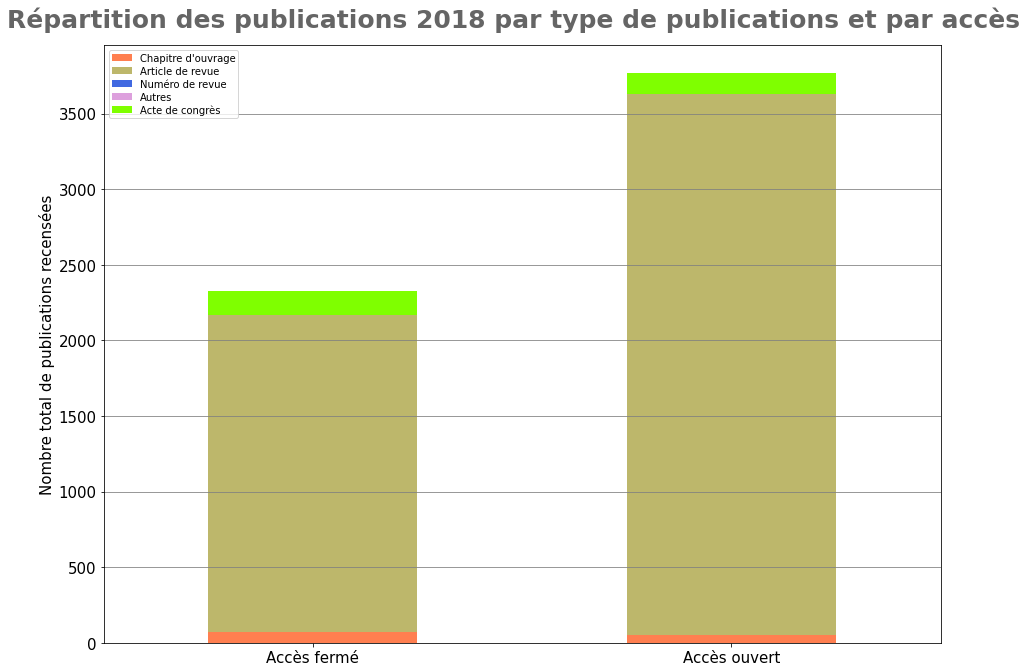

In [84]:
ax = df_oa_by_type.plot(kind="bar", stacked=True, figsize=(15, 11), rot=0, color = ['coral', 'darkkhaki', 'royalblue',
                                                                                    'plum', 'chartreuse', 'darkcyan',
                                                                                    'yellow', 'aquamarine'])

# Les couleurs ci-dessus peuvent être changées en choisissant parmi les codes suivants : http://www.python-simple.com/img/img44.png

ax.set_xticklabels(('Accès fermé', 'Accès ouvert'))

plt.xlabel(None)  
plt.ylabel("Nombre total de publications recensées", fontsize=15)

axes = plt.gca()

plt.gca().yaxis.grid(True, which = 'both', color = 'gray', zorder = 0)
plt.tick_params(axis = 'both', labelsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Ouvrage", "Chapitre d'ouvrage"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

# légende Lorraine
#plt.legend(["Ouvrage", "Chapitre d'ouvrage", "Données de recherche", "Article de revue", "Numéro de revue", "Monographie"
#           , "Pré-publication", "Acte de congrès"],
#              loc = 'best', ncol = 1,
#              frameon = True, markerscale = 2, title = None,
#              borderpad = 0.3, labelspacing = 0.3)

# légende UGA
plt.legend(["Chapitre d'ouvrage", "Article de revue", "Numéro de revue", "Autres"
           , "Acte de congrès"],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3)


plt.title("Répartition des publications 2018 par type de publications et par accès", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_type.png', dpi=100, bbox_inches='tight', pad_inches=0.9)